In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
#importing csv file 
drive.mount('/content/drive')
path = "/content/drive/MyDrive/assign/Data Set 1.csv"
df = pd.read_csv(path)

Mounted at /content/drive


In [2]:
shuffle_df = df.sample(frac=1)      #shuffling

train_size = int(0.67 * len(df))    #split ratio 67:33
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]
#test_set

X_train = train_set.iloc[:, 2:].values         #Independent Variables
X_test = test_set.iloc[:, 2:].values

Y_train = train_set.iloc[:,1].values          #Dependent Variable
Y_test = test_set.iloc[:,1].values
Y_train = np.array([1 if i == 'M' else 0 for i in Y_train])
Y_test = np.array([1 if i == 'M' else 0 for i in Y_test])

def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

X_test = standardize_data(X_test)
X_train = standardize_data(X_train)

mean1 = np.nanmean(X_train)
mean2 = np.nanmean(X_test)
# Replace NaN values with mean
X_train[np.isnan(X_train)] = mean1
X_test[np.isnan(X_test)] = mean2

X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)


Shape of X_train :  (30, 381)
Shape of Y_train :  (1, 381)
Shape of X_test :  (30, 188)
Shape of Y_test :  (1, 188)


Batch GD

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        #Y = np.array(Y)
        # cost function
        cost = -(1/m)*np.sum( (Y*np.log(A)) + ((1-Y)*np.log(1-A)) )
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

Mini Batch GD

In [13]:
def hypothesis(X, theta):
    return np.dot(X, theta)
 
# function to compute gradient of error function w.r.t. theta
 
 
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad
 
# function to compute the error for current values of theta
 
 
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches
 
# function to perform mini-batch gradient descent
 
 
def model2(X, y, learning_rate, batch_size):
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            cost_list.append(cost(X_mini, y_mini, theta))
    W = theta[1:]
    B = theta[0]

 
    return W, B, cost_list

In [4]:
iterations = 10000
learning_rate = 0.001
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  1000 iteration is :  0.275330348774428
cost after  2000 iteration is :  0.20299626503968154
cost after  3000 iteration is :  0.16982665230392105
cost after  4000 iteration is :  0.1501657175215608
cost after  5000 iteration is :  0.13695111207287122
cost after  6000 iteration is :  0.12735901429587126
cost after  7000 iteration is :  0.12002291606174958
cost after  8000 iteration is :  0.114196245318413
cost after  9000 iteration is :  0.10943448244268351


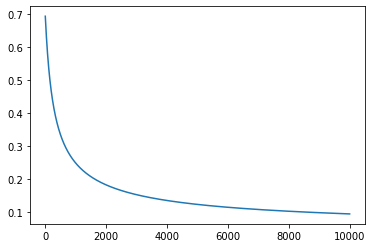

In [9]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [17]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  97.34 %
